In [0]:
%%capture
!pip install pyLDAvis

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
from collections import Counter
import numpy as np
from nltk import word_tokenize, sent_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

import gensim
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary
from gensim import corpora

import pyLDAvis.gensim
pyLDAvis.enable_notebook()

import os, re, operator, warnings
warnings.filterwarnings('ignore')  
%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
from sklearn.datasets import fetch_20newsgroups
dataset = fetch_20newsgroups(shuffle=True, random_state=1,remove=('headers', 'footers', 'quotes')).data

In [0]:
STOP_WORDS = stopwords.words("english")

def tokenize(x):
    return [word for word in word_tokenize(x) if word not in STOP_WORDS and word.isalpha() and len(word)>1]
    
texts= [tokenize(doc.lower()) for doc in dataset]


In [0]:
dictionary = corpora.Dictionary(texts)
print(len(dictionary))
dictionary.filter_extremes(no_below=10, no_above=0.5)
print(len(dictionary))

60520
9188


In [0]:
corpus = [dictionary.doc2bow(text) for text in texts]

In [0]:
lsimodel = LsiModel(corpus=corpus, num_topics=25, id2word=dictionary)

In [0]:
lsimodel.print_topics(10,4)


[(0, '0.996*"max" + 0.055*"giz" + 0.029*"wm" + 0.027*"qax"'),
 (1, '0.259*"file" + 0.232*"one" + 0.166*"use" + 0.161*"would"'),
 (2, '0.948*"db" + 0.148*"cs" + 0.124*"bh" + 0.103*"byte"'),
 (3, '-0.530*"file" + -0.192*"output" + 0.188*"people" + 0.169*"said"'),
 (4, '-0.440*"file" + -0.226*"output" + 0.190*"available" + 0.161*"image"'),
 (5, '-0.491*"jpeg" + -0.311*"image" + -0.208*"file" + -0.199*"gif"'),
 (6, '-0.280*"file" + 0.268*"output" + 0.231*"entry" + -0.189*"gun"'),
 (7, '-0.249*"hockey" + -0.212*"jpeg" + -0.195*"league" + -0.173*"team"'),
 (8, '-0.299*"wire" + -0.271*"wiring" + -0.187*"jpeg" + -0.151*"neutral"'),
 (9, '-0.331*"disk" + -0.308*"drive" + -0.262*"drives" + -0.229*"hard"')]

In [0]:
ldamodel = LdaModel(corpus=corpus, num_topics=25, id2word=dictionary, iterations=2000, passes=10)


In [0]:
ldamodel.print_topics(10, 6)

[(9,
  '0.013*"new" + 0.011*"april" + 0.010*"health" + 0.009*"national" + 0.009*"medical" + 0.008*"research"'),
 (23,
  '0.012*"use" + 0.011*"food" + 0.008*"msg" + 0.007*"people" + 0.007*"one" + 0.007*"henrik"'),
 (6,
  '0.029*"window" + 0.022*"program" + 0.015*"application" + 0.011*"code" + 0.011*"set" + 0.010*"subject"'),
 (7,
  '0.613*"max" + 0.062*"wm" + 0.056*"giz" + 0.022*"ql" + 0.022*"qax" + 0.019*"pl"'),
 (14,
  '0.021*"game" + 0.019*"team" + 0.015*"games" + 0.013*"play" + 0.012*"season" + 0.010*"hockey"'),
 (18,
  '0.015*"people" + 0.013*"would" + 0.012*"one" + 0.008*"gun" + 0.008*"right" + 0.006*"think"'),
 (5,
  '0.030*"would" + 0.028*"know" + 0.025*"thanks" + 0.024*"anyone" + 0.019*"like" + 0.018*"problem"'),
 (2,
  '0.036*"file" + 0.017*"files" + 0.015*"information" + 0.015*"available" + 0.012*"entry" + 0.012*"send"'),
 (20,
  '0.027*"armenian" + 0.024*"turkish" + 0.020*"armenians" + 0.017*"greek" + 0.016*"turkey" + 0.015*"war"'),
 (0,
  '0.021*"key" + 0.019*"god" + 0.012*

In [0]:
new_text = """Gun politics is an area of American politics defined by two primary opposing ideologies about civilian gun ownership. 
People who advocate for gun control support increasing regulations related to gun ownership. 
people who advocate for gun rights support decreasing regulations related to gun ownership. 
These groups often disagree on the interpretation of laws and court cases related to firearms as well as about the effects of firearms regulation on crime and public safety. 
It is estimated that U.S. civilians own 393 million firearms, and that 35% to 42% of the households in the country have at least one gun"""

# transform held_out_text into the bag-of-words space
bow_vector = dictionary.doc2bow(tokenize(new_text))
lda_vector = ldamodel[bow_vector]
print(lda_vector)
# print the document's single most prominent LDA topic
print(ldamodel.print_topic(max(lda_vector, key=lambda item: item[1])[0]))

[(4, 0.021011118), (9, 0.237837), (18, 0.40699992), (24, 0.3183029)]
0.015*"people" + 0.013*"would" + 0.012*"one" + 0.008*"gun" + 0.008*"right" + 0.006*"think" + 0.006*"point" + 0.006*"guns" + 0.006*"evidence" + 0.005*"argument"


In [0]:
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
13     0.158170  0.059412       1        1  10.034515
1      0.060898 -0.050603       2        1   8.025342
3      0.035981 -0.170942       3        1   7.797314
10     0.229273  0.051070       4        1   6.459332
18     0.181287  0.025903       5        1   6.290041
15     0.206656  0.034746       6        1   5.651968
2     -0.117489 -0.218335       7        1   5.425375
24    -0.003306  0.031210       8        1   5.001563
5      0.172677 -0.056745       9        1   4.966340
0      0.127530  0.027601      10        1   4.550637
9     -0.139795 -0.082645      11        1   4.026726
14    -0.080592  0.075089      12        1   3.783410
11    -0.048925 -0.175609      13        1   3.655220
22     0.153015  0.061674      14        1   3.056406
6     -0.099429 -0.164209      15        1   2.823482
21    -0.151295 -0.084476      16        1   2.810292
12    -0.100874 -0.217015      17        1   2.516920
23     0.086145 -0.015507      18        1   2.489026
4      0.007765  0.129044      19        1   2.164726
20    -0.142070  0.055696      20        1   2.000095
17     0.167031  0.063795      21        1   1.515274
16    -0.251599  0.075027      22        1   1.404739
19     0.024847  0.109773      23        1   1.394689
8     -0.235171  0.208458      24        1   1.378848
7     -0.240730  0.227588      25        1   0.777716, topic_info=     Category         Freq   Term        Total  loglift  logprob
5678  Default  4202.000000    max  4202.000000  30.0000  30.0000
248   Default  1720.000000   file  1720.000000  29.0000  29.0000
1480  Default  1764.000000    god  1764.000000  28.0000  28.0000
129   Default  6403.000000  would  6403.000000  27.0000  27.0000
1263  Default  1134.000000  space  1134.000000  26.0000  26.0000
...       ...          ...    ...          ...      ...      ...
4722  Topic25   127.349068     pl   178.275909   4.5202  -3.9852
4740  Topic25    21.696043     sb    32.170254   4.4627  -5.7550
7345  Topic25    18.532087   pace    26.390535   4.5031  -5.9127
6300  Topic25    17.482540     ds    25.507828   4.4788  -5.9710
9013  Topic25    17.625885     lk    34.984093   4.1710  -5.9628

[1661 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
2600     12  0.992745      abc
1865      1  0.076989     able
1865      2  0.031066     able
1865      3  0.055378     able
1865      4  0.153978     able
...     ...       ...      ...
1443     12  0.456656     york
1443     14  0.003358     york
1443     20  0.097375     york
8448      8  0.985850  zionism
8792     23  0.982801  zionist

[5086 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 2, 4, 11, 19, 16, 3, 25, 6, 1, 10, 15, 12, 23, 7, 22, 13, 24, 5, 21, 18, 17, 20, 9, 8])

In [0]:
lsitopics  = [[word for word, prob in topic] for topicid, topic in lsimodel.show_topics(25,formatted=False)]
ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(25,formatted=False)]

In [0]:
lsa_coherence = CoherenceModel(topics=lsitopics, texts=texts, dictionary=dictionary, window_size=30,coherence='c_npmi',topn=5).get_coherence_per_topic()
lda_coherence = CoherenceModel(topics=ldatopics, texts=texts, dictionary=dictionary, window_size=30,coherence='c_npmi',topn=5).get_coherence_per_topic()

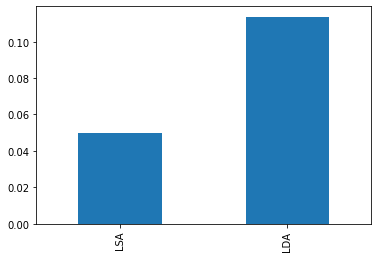

In [0]:
df_lda = pd.DataFrame([range(25),lda_coherence,ldatopics],index=['topic_id','coherence','topic']).transpose()
df_lsa = pd.DataFrame([range(25),lsa_coherence,lsitopics],index=['topic_id','coherence','topic']).transpose()
pd.Series({'LSA':np.mean(lsa_coherence),'LDA':np.mean(lda_coherence)}).plot.bar();

In [0]:
df_lda.sort_values(by='coherence',ascending=False)[:10]


,topic_id,coherence,topic
7,7,0.544373,"[max, wm, giz, ql, qax, pl, tobacco, nuy, sl, ..."
20,20,0.343614,"[armenian, turkish, armenians, greek, turkey, ..."
14,14,0.336296,"[game, team, games, play, season, hockey, leag..."
11,11,0.27174,"[drive, card, disk, system, hard, scsi, memory..."
2,2,0.20845,"[file, files, information, available, entry, s..."
12,12,0.207277,"[software, number, mac, pc, hardware, computer..."
9,9,0.204461,"[new, april, health, national, medical, resear..."
6,6,0.146542,"[window, program, application, code, set, subj..."
5,5,0.106276,"[would, know, thanks, anyone, like, problem, g..."
24,24,0.103849,"[government, president, state, people, states,..."
